1. Introduction
==


In this mission, we'll be calculating statistics using data from the National Basketball Association (NBA). Here are the first few rows of the CSV file we'll explore:

| | player | pos           | age | bref_team_id | g   | gs | mp | fg   | fga | fg.  | ...   | drb | trb | ast | stl | blk | tov | pf  | pts | season | season_end |     
|--------|---------------|-----|--------------|-----|----|----|------|-----|------|-------|-----|-----|-----|-----|-----|-----|-----|-----|--------|------------|------|
| 0      | Quincy Acy    | SF  | 23           | TOT | 63 | 0  | 847  | 66  | 141  | 0.468 | ... | 144 | 216 | 28  | 23  | 26  | 30  | 122 | 171    | 2013-2014  | 2013 |
| 1      | Steven Adams  | C   | 20           | OKC | 81 | 20 | 1197 | 93  | 185  | 0.503 | ... | 190 | 332 | 43  | 40  | 57  | 71  | 203 | 265    | 2013-2014  | 2013 |
| 2      | Jeff Adrien   | PF  | 27           | TOT | 53 | 12 | 961  | 143 | 275  | 0.520 | ... | 204 | 306 | 38  | 24  | 36  | 39  | 108 | 362    | 2013-2014  | 2013 |
| 3      | Arron Afflalo | SG  | 28           | ORL | 73 | 73 | 2552 | 464 | 1011 | 0.459 | ... | 230 | 262 | 248 | 35  | 3   | 146 | 136 | 1330   | 2013-2014  | 2013 |
| 4      | Alexis Ajinca | C   | 25           | NOP | 56 | 30 | 951  | 136 | 249  | 0.546 | ... | 183 | 277 | 40  | 23  | 46  | 63  | 187 | 328    | 2013-2014  | 2013 |


Each row holds data on a single player for a single season. It contains the player's team, the total number of points the player scored, and other information.

A full glossary can be find [here](http://stats.nba.com/help/glossary/).

| column_name  | name                          | 
|--------------|-------------------------------|
| player       | Player                        | 
| pos          | Position                      |
| age          | Age                           | 
| bref_team_id | Team ID                       |
| g            | Games Played                  | 
| gs           | Games Started                 | 
| mp           | Minutes Per Game              | 
| fg           | Field Goals Made Per Game     | 
| fga          | Field Goal Attempts Per Game  | 
| fg.          | Field Goal %                  | 
| x3p          | 3PT Shots Made Per Game       | 
| x3pa         | 3PT Shot Attempts Per Game    | 
| x3p.         | 3PT %                         | 
| x2p          | 2PT Shots Made Per Game       | 
| x2pa         | 2PT Shot Attemps Per Game     | 
| x2p.         | 2PT Shot %                    | 
| ft           | Free Throws Made Per Game     |
| fta          | Free Throw Attempts Per Game  | 
| ft.          | Free Throw %                  | 
| orb          | Offensive Rebounds Per Game   | 
| drb          | Defensive Rebounds Per Game   | 
| trb          | Total Rebounds Per Game       | 
| ast          | Assists Per Game              | 
| stl          | Steals Per Game               | 
| blk          | Blocks Per Game               | 
| tov          | Turnovers Per Game            | 
| pf           | Personal Fouls Per Game       |
| pts          | Points Per Game               | 


In [1]:
import pandas as pd

nba = pd.read_csv('nba_2013.csv')
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


2. Using Scatterplots to Plot Correlations
==

We've spent a lot of time looking at single variables and how their distributions look. While distributions are interesting on their own, it can also be revealing to look at how two variables correlate with each other.

Much of statistics deals with analyzing how variables impact each other, and the first step is to graph them out with a scatterplot.

While graphing them out, we can look at correlation. If two variables change together (ie, when one goes up, the other goes up), we know that they are correlated.

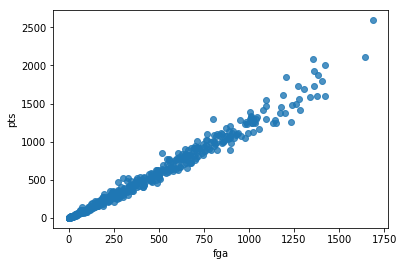

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot field goals attempted (number of shots someone takes in a season) vs. point scored in a season.
# Field goals attempted is on the x-axis, and points is on the y-axis.
# As you can tell, they are very strongly correlated. The plot is close to a straight line.
# The plot also slopes upward, which means that as field goal attempts go up, so do points.
# That means that the plot is positively correlated.

sns.regplot(x=nba['fga'], y=nba['pts'],fit_reg=False)
plt.show()

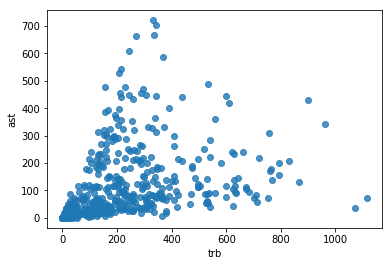

In [3]:
# Now, we can plot total rebounds (number of times someone got the ball back
# for their team after someone shot) vs total assists (number of times someone helped another person score).
# These are uncorrelated, so you don't see the same nice line as you see with the plot above.

sns.regplot(nba["trb"], nba["ast"],fit_reg=False)
plt.show()

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Make a scatterplot of the  <span style="background-color: #F9EBEA; color:##C0392B">fta</span> column against the <span style="background-color: #F9EBEA; color:##C0392B">pts</span> column.
2. Make a scatterplot of the <span style="background-color: #F9EBEA; color:##C0392B">stl</span> column against the <span style="background-color: #F9EBEA; color:##C0392B">pf</span> column.


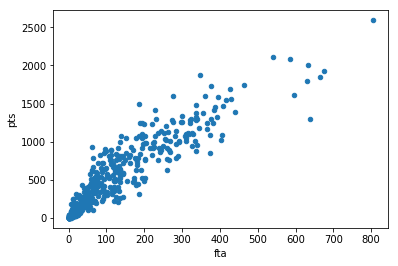

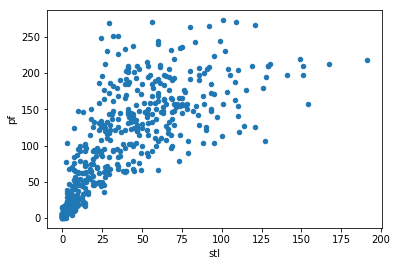

In [4]:
nba.plot(kind='scatter',x='fta', y='pts')
nba.plot(kind='scatter',x='stl', y='pf')

3. Measuring Correlation with Pearson's r
==

Measuring correlation can be a big help when we need to analyze a lot of variables. This spares us from having to eyeball everything.

The most common way to measure correlation is to use Pearson's r, which we also call an r-value. We'll explore how the calculations work later. For now, though, we'll focus on the values. An r-value ranges from -1 to 1, and indicates how strongly two variables are correlated.

- A 1 indicates a perfect positive correlation. This would appear as a straight, upward-sloping line on our plots.
- A 0 indicates no correlation. We'd see a scatterplot with points that appear random.
- A -1 indicates a perfect negative correlation. This would appear as a straight, downward-sloping line.

Any correlation between -1 and 0 will show up as a scattering of points. The same is true of correlations falling between 0 and 1. The closer the value is to 0, the more random the points will appear. The closer it is to -1 or 1, the more "line-like" the points will appear.

We can use a function from scipy to calculate Pearson's r.

In [5]:
from scipy.stats.stats import pearsonr

# The pearsonr function will find the correlation between two columns of data.
# It returns the r value and the p value.  We'll learn more about p values later on.
r, p_value = pearsonr(nba["fga"], nba["pts"])

# As we can see, this is a very high positive r value - it's close to 1.
print(r,p_value)

# These two columns are much less correlated.
r, p_value = pearsonr(nba["trb"], nba["ast"])

# We get a much lower, but still positive, r value.
print(r,p_value)

0.9892114006521625 0.0
0.3698617312483286 4.8634995505196213e-17


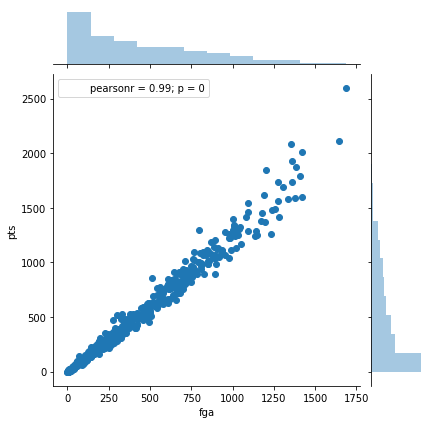

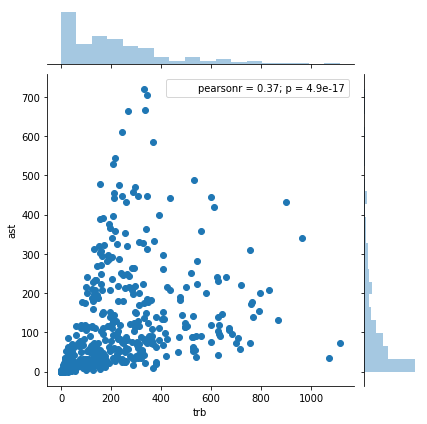

In [6]:
# Draw a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x=nba["fga"], y=nba["pts"])
sns.jointplot(x=nba["trb"], y=nba["ast"])

plt.show()

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Find the correlation between the <span style="background-color: #F9EBEA; color:##C0392B">fta</span> column and the <span style="background-color: #F9EBEA; color:##C0392B">pts</span> column. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">r_fta_pts</span>.
2. Find the correlation between the <span style="background-color: #F9EBEA; color:##C0392B">stl</span> column and the <span style="background-color: #F9EBEA; color:##C0392B">pf</span> column. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">r_stl_pf</span>.

In [7]:
r_fta_pts, p_fta_value = pearsonr(nba["fta"], nba["pts"])
print(r_fta_pts, p_fta_value)
r_stl_pts, p_stl_value = pearsonr(nba["stl"], nba["pf"])
print(r_stl_pts, p_stl_value)

0.9189785384020999 1.0071286958606185e-195
0.7376282167485283 9.84633922190514e-84


4. Calculate Covariance
==

We looked at finding the correlation coefficient with a function. Now, let's take a brief look under the hood to see how we can do it ourselves.

Another way to think of correlation is in terms of **variance**. Two variables are correlated when they both vary individually, but in similar ways. For example, correlation occurs when if one variable goes up, another variable also goes up.

This is called **covariance**. Covariance refers to how different numbers vary jointly.

There's a limit to how much two variables can co-vary. This is because each variable has its own variance. These individual variances set a maximum theoretical limit on the covariance between two variables. In other words, a set of variables can't co-vary more from the mean than the two variables individually vary from the mean.

Two variables reach the maximum possible covariance when they vary in an identical way (ie, you see a straight line on the plot).

The r-value is a ratio between the actual covariance and the maximum possible positive covariance.

Let's look at actual covariance first. Mathematically speaking, covariance between two variables looks like this:

$\displaystyle cov(x,y) = \frac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{n}$

For each element in the vectors x and y, we:

1. Take the value at each position from 1 to the length of the vectors.
2. Subtract the mean of the vector from those values.
3. Multiply them together at each position, and all of the resulting values together.



<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:


1. Make a function that calculates covariance.
2. Use the function to calculate the covariance of the <span style="background-color: #F9EBEA; color:##C0392B">stl</span> and <span style="background-color: #F9EBEA; color:##C0392B">pf</span> columns. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">cov_stl_pf</span>.
3. Use the function to calculate the covariance of the <span style="background-color: #F9EBEA; color:##C0392B">fta</span> and <span style="background-color: #F9EBEA; color:##C0392B">pts</span> columns. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">cov_fta_pts</span>.

In [8]:
import numpy as np

def cov(x,y):
    #Primeiro método: utilizando list comprehension
    mx = x.mean()
    my = y.mean()
    varx = [x[i] - mx for i in range(0,len(x))]
    vary = [y[i] - my for i in range(0,len(y))]
    mult = [ varx[i]*vary[i] for i in range (0,len(varx))]
    return  np.asarray(mult).sum()/len(varx)
    
    #Segundo método com append
    #for i in range(0,len(x)):
        #varx.append(x[i] - mx)
        
    #for i in range(0,len(y)):
        #vary.append(y[i] - my)   
    #tmp = 0
    #for i in range (0,len(varx)):
        #tmp += varx[i]*vary[i]
    #return tmp/len(varx)

cov_stl_pf = cov(nba["stl"],nba["pf"])
cov_fta_pts = cov(nba["fta"],nba["pts"])

print(cov_stl_pf)
print(cov_fta_pts)

1823.3548480513134
56618.4139807487


4. Calculate Correlation With the std() Method
==

Now that we know how to calculate covariance, we can get the **correlation coefficient** using the following formula:

$\displaystyle \frac{cov(x,y)}{\sigma_x \sigma_y}$

For the denominator, we need to multiply the standard deviations for x and y. This is the maximum possible positive covariance, which is just both of the standard deviation values multiplied. If we divide our actual covariance by this, we get the r-value.

We can use the <span style="background-color: #F9EBEA; color:##C0392B">std</span> method on any pandas [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) or [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html) to calculate the standard deviation. The following code returns the standard deviation for the <span style="background-color: #F9EBEA; color:##C0392B">pf</span> column:

>```python
nba_stats["pf"].std()
```

We can use the cov function from NumPy to compute covariance, returning a 2x2 matrix. The following code returns the covariance between the pf and stl columns:

>```python
# bias = True cov assume the population n
# bias = False cov assume the population n-1
cov(nba_stats["pf"], nba_stats["stl"], bias = True)[0,1]
```


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Compute the correlation coefficient for the <span style="background-color: #F9EBEA; color:##C0392B">fta</span> and <span style="background-color: #F9EBEA; color:##C0392B">blk</span> columns, and assign the result to <span style="background-color: #F9EBEA; color:##C0392B">r_fta_blk</span>.
2. Compute the correlation coefficient for the <span style="background-color: #F9EBEA; color:##C0392B">ast</span> and <span style="background-color: #F9EBEA; color:##C0392B">stl</span> columns, and assign the result to <span style="background-color: #F9EBEA; color:##C0392B">r_ast_stl</span>.


In [9]:
import numpy as np
#Utilizando a função definida no notebook
r_fta_blk = cov(nba["fta"],nba["blk"])/(nba["fta"].std()*nba["blk"].std())
r_fta_blk

0.45511466658856353

In [10]:
#Temos também esse método que utiliza função cov do numpy
r_fta_blk = np.cov(nba["fta"], nba["blk"], bias = True)[0,1]/(nba['fta'].std()*nba['blk'].std())
r_fta_blk

0.4551146665885637

In [11]:
#Utilizando a função definida no notebook#Utiliza 
r_fta_blk = cov(nba["ast"],nba["stl"])/(nba["ast"].std()*nba['stl'].std())
r_fta_blk

0.7688262580972288

In [14]:
#Temos também esse método que utiliza função cov do numpy
r_fta_blk = np.cov(nba["ast"], nba["stl"], bias = True)[0,1]/(nba['ast'].std()*nba['stl'].std())
r_fta_blk

0.7688262580972289